In [1]:
# Importación de librerías
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Configuración de visualización
sns.set_theme(style="whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)

# Verificar estructura del proyecto
notebook_dir = os.getcwd()
print("Directorio actual:", notebook_dir)

# Detectar y configurar rutas
if os.path.basename(notebook_dir) == 'notebooks':
    project_dir = os.path.dirname(notebook_dir)
    data_path = os.path.join(notebook_dir, 'data', 'processed')
else:
    project_dir = notebook_dir
    data_path = os.path.join(project_dir, 'notebooks', 'data', 'processed')

print("Directorio del proyecto:", project_dir)

# Verificar y crear directorios necesarios
src_path = os.path.join(project_dir, 'src')
utils_path = os.path.join(src_path, 'utils')

# Crear __init__.py si no existen
init_files = [
    os.path.join(src_path, '__init__.py'),
    os.path.join(utils_path, '__init__.py')
]

for init_file in init_files:
    if not os.path.exists(os.path.dirname(init_file)):
        os.makedirs(os.path.dirname(init_file))
    if not os.path.exists(init_file):
        open(init_file, 'a').close()
        print(f"Creado {init_file}")

print("\nVerificando estructura del proyecto:")
print(f"¿Existe src/?: {os.path.exists(src_path)}")
print(f"¿Existe data/processed/?: {os.path.exists(data_path)}")

if os.path.exists(data_path):
    print("\nContenido de data/processed/:")
    print(os.listdir(data_path))

# Agregar proyecto al path de Python
if os.path.exists(project_dir):
    if project_dir not in sys.path:
        sys.path.insert(0, project_dir)
        print("\nPath actualizado:", project_dir)

# Intentar importar nuestros módulos
try:
    from src.utils.model_engineering import ModelEngineer
    print("\nMódulos importados correctamente")
except ImportError as e:
    print("\nError importando módulos:", str(e))
    print("\nDetalles del error:")
    import traceback
    traceback.print_exc()

# Definir período de análisis
end_date = datetime.now()
end_date_str = end_date.strftime('%Y-%m-%d')

Directorio actual: /Users/mayel/repos/banco-base-proyecto-test/notebooks
Directorio del proyecto: /Users/mayel/repos/banco-base-proyecto-test

Verificando estructura del proyecto:
¿Existe src/?: True
¿Existe data/processed/?: True

Contenido de data/processed/:
['stocks_2024-11-11.csv', 'stocks_2024-11-10.csv', 'stocks_2024-11-12.csv', 'features', 'sentiment_features_2024-11-12.csv', 'fx_rates_2024-11-12.csv', 'models', 'fx_rates_2024-11-10.csv', 'fx_rates_2024-11-11.csv', 'correlation_matrix_2024-11-11.csv', 'correlation_matrix_2024-11-10.csv', 'correlation_matrix_2024-11-12.csv', 'statistical_features_2024-11-12.csv', 'news_2024-11-12.csv', 'news_2024-11-11.csv', 'news_2024-11-10.csv', 'technical_features_2024-11-12.csv']

Path actualizado: /Users/mayel/repos/banco-base-proyecto-test


2024-11-12 20:18:38.431119: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Módulos importados correctamente


In [2]:
# Cargar datos procesados
try:
    print("\nCargando datos procesados...")
    
    # Cargar características técnicas
    tech_files = [f for f in os.listdir(data_path) if f.startswith('technical_features_')]
    latest_tech = max(tech_files)
    technical_data = pd.read_csv(os.path.join(data_path, latest_tech), index_col=0, parse_dates=True)
    print(f"Datos técnicos cargados de: {latest_tech}")
    
    # Cargar características estadísticas
    stat_files = [f for f in os.listdir(data_path) if f.startswith('statistical_features_')]
    latest_stat = max(stat_files)
    statistical_data = pd.read_csv(os.path.join(data_path, latest_stat), index_col=0, parse_dates=True)
    print(f"Datos estadísticos cargados de: {latest_stat}")
    
    # Cargar características de sentimiento si existen
    sentiment_data = None
    sent_files = [f for f in os.listdir(data_path) if f.startswith('sentiment_features_')]
    if sent_files:
        latest_sent = max(sent_files)
        sentiment_data = pd.read_csv(os.path.join(data_path, latest_sent), index_col=0, parse_dates=True)
        print(f"Datos de sentimiento cargados de: {latest_sent}")

except Exception as e:
    print(f"\nError cargando los datos: {str(e)}")
    raise


Cargando datos procesados...
Datos técnicos cargados de: technical_features_2024-11-12.csv
Datos estadísticos cargados de: statistical_features_2024-11-12.csv
Datos de sentimiento cargados de: sentiment_features_2024-11-12.csv


In [3]:
# Inicializar el modelo
model_engineer = ModelEngineer()

Usando Keras versión: 2.10.0



Preparando datos para el modelo...

Dimensiones de los datos:
Train: (44, 10, 28)
Test: (11, 10, 28)

Construyendo modelo LSTM...

Entrenando modelo...
Epoch 1/1250
5/5 [==============================] - 6s 235ms/step - loss: 0.1031 - mae: 0.2569 - val_loss: 0.0943 - val_mae: 0.3039
Epoch 2/1250
5/5 [==============================] - 0s 29ms/step - loss: 0.0688 - mae: 0.2120 - val_loss: 0.0774 - val_mae: 0.2744
Epoch 3/1250
5/5 [==============================] - 0s 18ms/step - loss: 0.0408 - mae: 0.1760 - val_loss: 0.1981 - val_mae: 0.4426
Epoch 4/1250
5/5 [==============================] - 0s 19ms/step - loss: 0.0334 - mae: 0.1394 - val_loss: 0.1892 - val_mae: 0.4326
Epoch 5/1250
5/5 [==============================] - 0s 17ms/step - loss: 0.0244 - mae: 0.1104 - val_loss: 0.0807 - val_mae: 0.2806
Epoch 6/1250
5/5 [==============================] - 0s 58ms/step - loss: 0.0282 - mae: 0.1292 - val_loss: 0.0586 - val_mae: 0.2381
Epoch 7/1250
5/5 [==============================] - 0s 17ms/

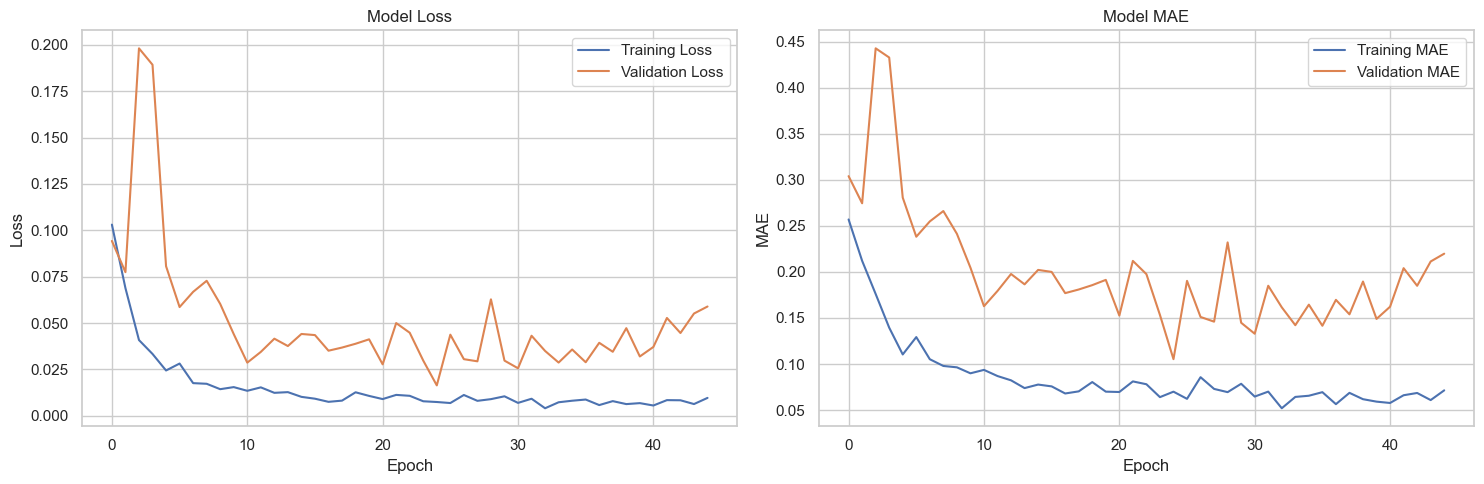


Evaluando modelo...
1/1 [==============================] - 1s 952ms/step

Métricas de evaluación:
loss: 0.0164
mae: 0.1053



Resultados guardados en: /Users/mayel/repos/banco-base-proyecto-test/notebooks/data/processed/models


In [19]:
# Preparar datos para el modelo
print("\nPreparando datos para el modelo...")
try:
    # Restablecer índices para evitar problemas de concatenación
    technical_data.reset_index(drop=True, inplace=True)
    statistical_data.reset_index(drop=True, inplace=True)
    if sentiment_data is not None:
        sentiment_data.reset_index(drop=True, inplace=True)
    
    train_data, test_data = model_engineer.prepare_data(
        technical_data=technical_data,
        statistical_data=statistical_data,
        sentiment_data=sentiment_data
    )
    
    print("\nDimensiones de los datos:")
    print(f"Train: {train_data['X'].shape}")
    print(f"Test: {test_data['X'].shape}")
    
    # Construir modelo con mayor parametrización
    print("\nConstruyendo modelo LSTM...")
    model_engineer.build_model(input_shape=(train_data['X'].shape[1], train_data['X'].shape[2]))
    
    # Entrenar modelo con más iteraciones y ajuste de parámetros
    print("\nEntrenando modelo...")
    history = model_engineer.train_model(
        train_data,
        test_data,
        epochs=1250,  # Ajustar las épocas para un mejor balance entre ajuste y recursos
        batch_size=10  # Ajustar el tamaño del lote para un entrenamiento más eficiente
    )
    
    # Visualizar historia del entrenamiento
    model_engineer.plot_training_history(history)
    
    # Evaluar modelo
    print("\nEvaluando modelo...")
    metrics, predictions = model_engineer.evaluate_model(test_data)
    print("\nMétricas de evaluación:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Visualizar predicciones con área de incertidumbre
    actual_values = model_engineer.scalers['target'].inverse_transform(test_data['y'])
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=np.arange(len(actual_values)),
        y=actual_values.flatten(),
        mode='lines',
        name='Valores Reales',
        line=dict(color='blue')
    ))
    
    fig.add_trace(go.Scatter(
        x=np.arange(len(predictions)),
        y=predictions.flatten(),
        mode='lines',
        name='Predicciones',
        line=dict(color='red')
    ))
    
    # Agregar banda de incertidumbre
    prediction_std = np.std(predictions.flatten() - actual_values.flatten())
    upper_bound = predictions.flatten() + (prediction_std * 1.96)  # Ajustar la incertidumbre al 95% de confianza
    lower_bound = predictions.flatten() - (prediction_std * 1.96)
    
    fig.add_trace(go.Scatter(
        x=np.arange(len(predictions)),
        y=upper_bound,
        mode='lines',
        name='Límite Superior',
        line=dict(color='rgba(255, 0, 0, 0.3)'),
        showlegend=False
    ))
    
    fig.add_trace(go.Scatter(
        x=np.arange(len(predictions)),
        y=lower_bound,
        mode='lines',
        name='Límite Inferior',
        line=dict(color='rgba(255, 0, 0, 0.3)'),
        fill='tonexty',
        fillcolor='rgba(255, 0, 0, 0.1)',
        showlegend=False
    ))
    
    fig.update_layout(
        title='Predicciones vs Valores Reales con Banda de Incertidumbre (95% de Confianza)',
        xaxis_title='Tiempo',
        yaxis_title='USD/MXN',
        template='plotly_white'
    )
    
    fig.show()
    
    # Guardar modelo y resultados
    output_dir = os.path.join(data_path, 'models')
    os.makedirs(output_dir, exist_ok=True)
    
    # Guardar métricas
    pd.DataFrame(metrics, index=[0]).to_csv(
        os.path.join(output_dir, f'model_metrics_{end_date_str}.csv')
    )
    
    # Guardar historia del entrenamiento
    history.to_csv(os.path.join(output_dir, f'training_history_{end_date_str}.csv'))
    
    print(f"\nResultados guardados en: {output_dir}")

except Exception as e:
    print(f"\nError en el proceso de modelado: {str(e)}")
    import traceback
    traceback.print_exc()

